<a href="https://colab.research.google.com/github/Bharath-Mani/Machine-Learning/blob/main/Dataclone_23_09_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [61]:
df=pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [62]:
X=df.drop('species',axis=1)
y=df['species']

In [63]:
species_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
y = y.map(species_map)

In [64]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('regressor', LogisticRegression())
])

pipeline.fit(x_train, y_train)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, x_train, y_train, cv=kf, scoring='r2')

print("Cross validation R2 scores:", scores)
print("Mean Cross validation R2 score:", np.mean(scores))

y_pred = pipeline.predict(x_test)

Cross validation R2 scores: [0.92079208 1.         0.89655172 0.81052632 1.        ]
Mean Cross validation R2 score: 0.9255740238270651


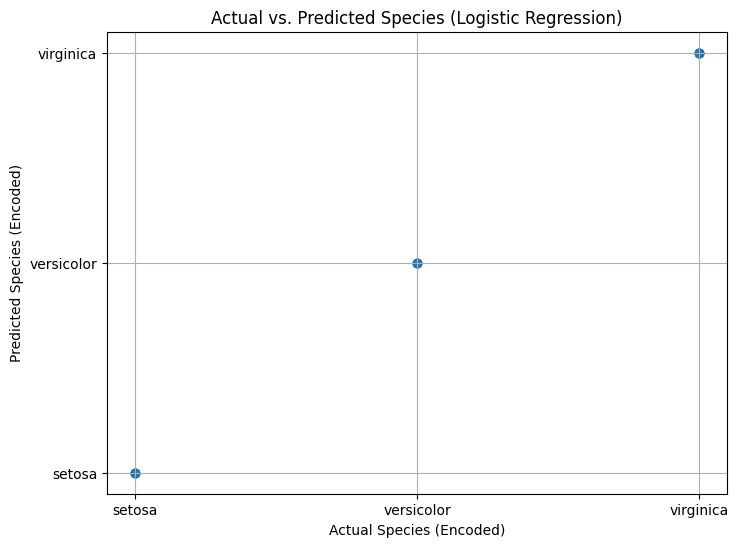

In [65]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Species (Encoded)")
plt.ylabel("Predicted Species (Encoded)")
plt.title("Actual vs. Predicted Species (Logistic Regression)")
plt.xticks([0, 1, 2], ['setosa', 'versicolor', 'virginica'])
plt.yticks([0, 1, 2], ['setosa', 'versicolor', 'virginica'])
plt.grid(True)
plt.show()

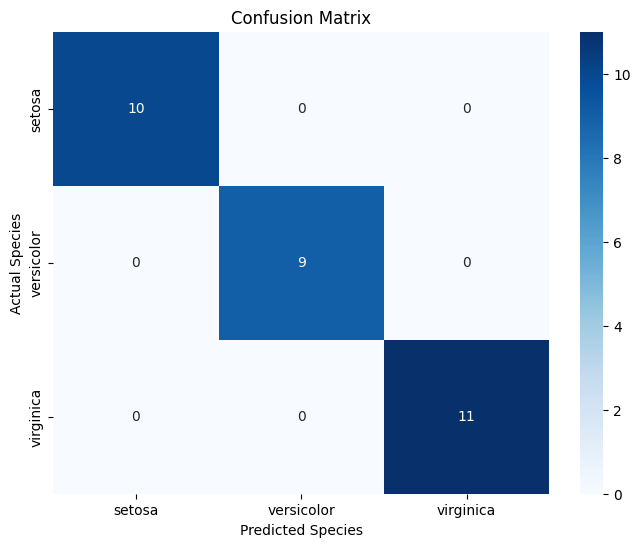

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['setosa', 'versicolor', 'virginica'],
            yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.title("Confusion Matrix")
plt.show()

In [67]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [68]:
df = df.drop('charges', axis=1)
display(df.head())

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


# Task
Perform linear regression on the "insurance.csv" dataset to predict the 'charges' column. Handle categorical features, split the data, train and evaluate the model, and visualize the results.

## Identify target variable

### Subtask:
Determine the target variable for the linear regression model (likely 'charges', which was previously removed, so we'll need to reload the data).


**Reasoning**:
Reload the 'insurance.csv' dataset and identify the 'charges' column as the target variable.



In [69]:
df = pd.read_csv('insurance.csv')
target_variable = 'charges'
print(f"Target variable identified as: {target_variable}")
display(df.head())

Target variable identified as: charges


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Handle categorical features

### Subtask:
Convert categorical features (like 'sex', 'smoker', 'region') into a numerical format suitable for linear regression using one-hot encoding.


**Reasoning**:
Apply one-hot encoding to the categorical columns and display the head of the new DataFrame.



In [70]:
categorical_cols = ['sex', 'smoker', 'region']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
display(df_encoded.head())

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## Split data

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets using the defined features and target variable.



In [71]:
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data split into training and testing sets.
Shape of X_train: (1070, 8)
Shape of X_test: (268, 8)
Shape of y_train: (1070,)
Shape of y_test: (268,)


## Train linear regression model

### Subtask:
Train a linear regression model on the training data.


**Reasoning**:
Import LinearRegression and train the model.



In [72]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
print("Linear regression model trained successfully.")

Linear regression model trained successfully.


In [73]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 33596915.85136145
R-squared (R2): 0.7835929767120724


Cross validation R2 scores: [0.81235067 0.79857571 0.87466301 0.81047689 0.856528  ]
Mean Cross validation R2 score: 0.8305188544735514
Mean Squared Error (test): 21164509.433660194
R2 Score (test): 0.8636735435433707


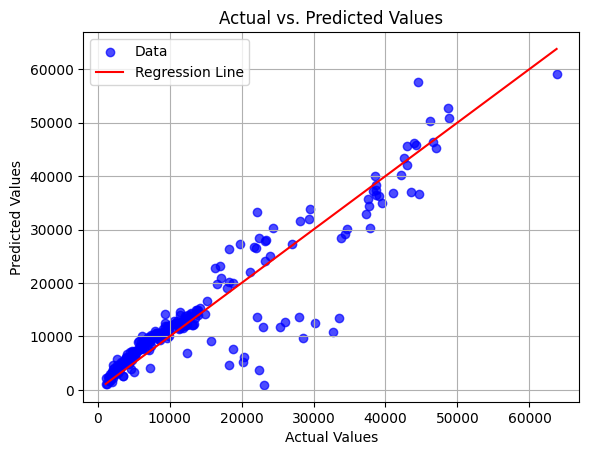

In [74]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

df = pd.read_csv(r"insurance.csv")

X = df.drop(columns=['charges'])
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features),
    ])),
    ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)),
    ('regressor', LinearRegression())
])

pipeline.fit(x_train, y_train)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, x_train, y_train, cv=kf, scoring='r2')

print("Cross validation R2 scores:", scores)
print("Mean Cross validation R2 score:", np.mean(scores))

y_pred = pipeline.predict(x_test)

print("Mean Squared Error (test):", mean_squared_error(y_test, y_pred))
print("R2 Score (test):", r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

Train: (802, 6) Validation: (268, 6) Test: (268, 6)
Cross validation R2 scores: [0.8123594  0.80433436 0.84380867 0.80358285 0.81912483]
Mean Cross validation R2 score: 0.8166420217543306
Validation MSE: 21304571.024565805
Validation R2: 0.8487609903262887
Test MSE: 24182687.033985056
Test R2: 0.8440933759140202


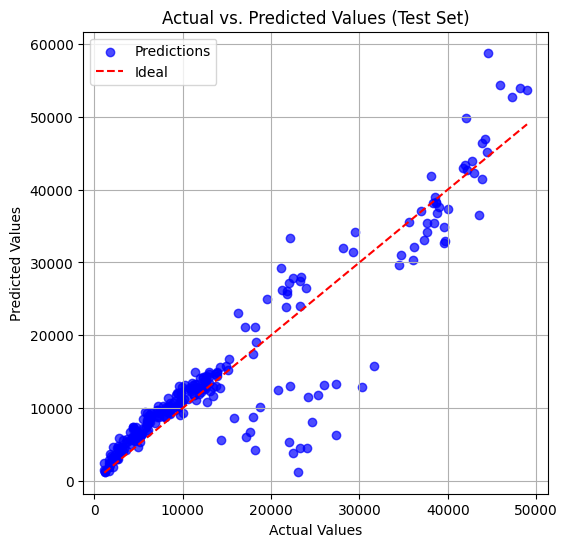

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# First split: Train (60%), Temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Second split: Validation (20%), Test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

print("Train:", X_train.shape, "Validation:", X_val.shape, "Test:", X_test.shape)

pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numerical_features),
    ])),
    ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)),
    ('regressor', LinearRegression())
])

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='r2')

print("Cross validation R2 scores:", scores)
print("Mean Cross validation R2 score:", np.mean(scores))

# Validation run
pipeline.fit(X_train, y_train)
y_val_pred = pipeline.predict(X_val)

# Validation Scores
print("Validation MSE:", mean_squared_error(y_val, y_val_pred))
print("Validation R2:", r2_score(y_val, y_val_pred))

y_test_pred = pipeline.predict(X_test)

print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R2:", r2_score(y_test, y_test_pred))

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.7, label='Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Test Set)')
plt.legend()
plt.grid(True)
plt.show()
